In [1]:
import pandas as pd
from ALS.CP import solve_multiple_runways_cp, solve_single_runway_cp
from ALS.MIP import solve_multiple_runways_mip, solve_single_runway_mip
from ALS.performanceCP import performance_CP
from ALS.performanceMIP import performance_MIP
from ALS.utils import read_data
from ortools.sat.python import cp_model
from ALS.visualization import visualize_solution

In [2]:
import ortools
print(ortools.__version__)


9.11.4210


In [3]:
filename = "data/airland3.txt"

num_planes, planes_data, separation_times = read_data(filename)

num_runways = 1

	       Reading data from airland3.txt

-> Number of planes: 20 



In [4]:
decision_strategies_multiple = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    },
    {
        "variables": "runway",
        "variable_strategy": cp_model.CHOOSE_FIRST,      
        "value_strategy": cp_model.SELECT_MAX_VALUE      
    }
]


solver, mem_before, mem_after = solve_multiple_runways_cp(num_planes, num_runways, planes_data, separation_times)
metrics_CP_multiple_runway = performance_CP(solver, planes_data, mem_before, mem_after)

		     Creating CP model

-> Number of decision variables created: 480
-> Number of constraints: 1261

			Solving CP

-> Optimal Cost: 820.0

-> Planes that did not land on the target time:
  -> Plane 2: 184 | Target Time: 160 | Penalty: 240.0
  -> Plane 5: 101 | Target Time: 106 | Penalty: 150.0
  -> Plane 7: 109 | Target Time: 108 | Penalty: 30.0
  -> Plane 8: 141 | Target Time: 132 | Penalty: 270.0
  -> Plane 9: 133 | Target Time: 130 | Penalty: 90.0
  -> Plane 11: 125 | Target Time: 126 | Penalty: 30.0
  -> Plane 16: 339 | Target Time: 338 | Penalty: 10.0

		Performance Metrics for CP

-> Execution time (s): 0.71199
-> Solution Status: OPTIMAL
-> Memory usage (MB): 14.2890625
-> Number of Conflicts: 1322
-> Number of Branches: 17005
-> Best objective bound: 820.0



In [5]:
decision_strategies_single = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    }
]

solver, variables, mem_before, mem_after = solve_single_runway_cp(num_planes, planes_data, separation_times, decision_strategies_single)
metrics_CP_single_runway = performance_CP(solver, planes_data, mem_before, mem_after)

		     Creating CP model

-> Number of decision variables created: 270
-> Number of constraints: 881

			Solving CP

-> Optimal Cost: 820.0

-> Planes that did not land on the target time:
  -> Plane 2: 184 | Target Time: 160 | Penalty: 240.0
  -> Plane 3: 116 | Target Time: 117 | Penalty: 30.0
  -> Plane 5: 100 | Target Time: 106 | Penalty: 180.0
  -> Plane 8: 140 | Target Time: 132 | Penalty: 240.0
  -> Plane 9: 132 | Target Time: 130 | Penalty: 60.0
  -> Plane 11: 124 | Target Time: 126 | Penalty: 60.0
  -> Plane 12: 335 | Target Time: 336 | Penalty: 10.0

		Performance Metrics for CP

-> Execution time (s): 0.559695
-> Solution Status: OPTIMAL
-> Memory usage (MB): 0.7265625
-> Number of Conflicts: 591
-> Number of Branches: 18274
-> Best objective bound: 820.0



In [6]:
solver, memory_before, memory_after = solve_multiple_runways_mip(num_planes, num_runways, planes_data, separation_times)
metrics_MIP_multiple_runway = performance_MIP(solver, mem_before, mem_after)

		    Creating MIP Solver

-> Number of decision variables created: 840
-> Number of constraints: 1110

			Solving MIP

-> Optimal Cost: 820.0

-> Planes that did not land on the target time:
  -> Plane 2: 184.0 | Target Time: 160 | Penalty: 240.0
  -> Plane 5: 101.0 | Target Time: 106 | Penalty: 150.0
  -> Plane 7: 109.0 | Target Time: 108 | Penalty: 30.0
  -> Plane 8: 133.0 | Target Time: 132 | Penalty: 30.0
  -> Plane 9: 141.0 | Target Time: 130 | Penalty: 330.0
  -> Plane 11: 125.0 | Target Time: 126 | Penalty: 30.0
  -> Plane 16: 339.0 | Target Time: 338 | Penalty: 10.0

		Performance Metrics for MIP

-> Execution time: 0.34 seconds
-> Number of variables in the model: 840
-> Number of constraints in the model: 1110
-> Total penalty: 820.0
-> Memory usage: 0.73 MB



In [7]:
selected_variables = [
    "metrics_CP_single_runway",
    "metrics_CP_multiple_runway"
]

# Filtrar as variáveis selecionadas
variables = {var: globals()[var] for var in selected_variables}

# Criar o DataFrame
data = {
    "Model": list(variables.keys()),
    "Execution Time": [v[0] for v in variables.values()],
    "Status": [v[1] for v in variables.values()],
    "Memory Usage": [v[2] for v in variables.values()],
    "Number of Conflicts": [v[3] for v in variables.values()],
    "Number of Branches": [v[4] for v in variables.values()],
    "Best Objective Bound": [v[5] for v in variables.values()]
}

df = pd.DataFrame(data)

In [8]:
df.head()

,Model,Execution Time,Status,Memory Usage,Number of Conflicts,Number of Branches,Best Objective Bound
0,metrics_CP_single_runway,0.559695,OPTIMAL,0.726562,591,18274,820.0
1,metrics_CP_multiple_runway,0.711990,OPTIMAL,14.289062,1322,17005,820.0


	       Reading data from airland1.txt

-> Number of planes: 10 

		    Creating MIP Solver

-> Number of decision variables created: 120
-> Number of constraints: 205

			Solving MIP

-> Optimal Cost: 700.0

-> Planes that did not land on the target time:
  -> Plane 0: 165.0 | Target Time: 155 | Penalty: 100.0
  -> Plane 4: 118.0 | Target Time: 123 | Penalty: 150.0
  -> Plane 5: 126.0 | Target Time: 135 | Penalty: 270.0
  -> Plane 6: 134.0 | Target Time: 138 | Penalty: 120.0
  -> Plane 7: 142.0 | Target Time: 140 | Penalty: 60.0

		Performance Metrics for MIP

-> Execution time: 0.08 seconds
-> Number of variables in the model: 120
-> Number of constraints in the model: 205
-> Total penalty: 700.0
-> Memory usage: 0.03 MB



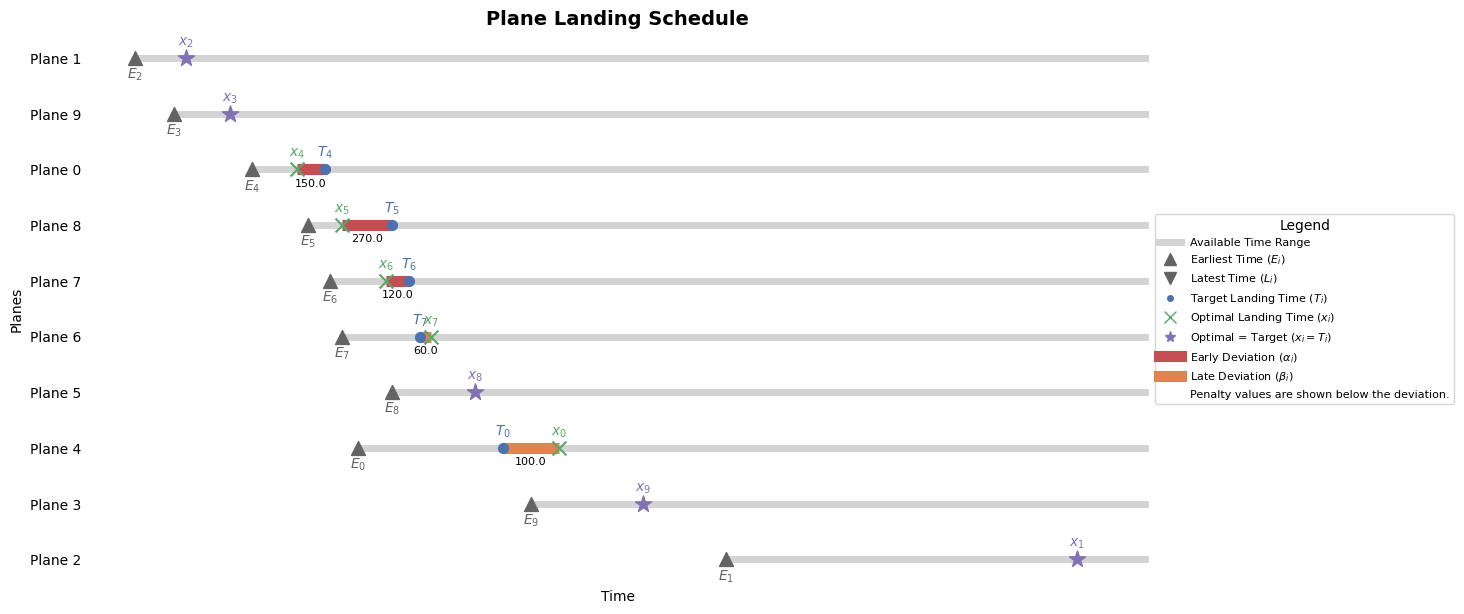

In [9]:
filename = "data/airland1.txt"

num_planes, planes_data, separation_times = read_data(filename)

solver, variables, memory_before, memory_after = solve_single_runway_mip(num_planes, planes_data, separation_times)
metrics_MIP_single_runway = performance_MIP(solver, memory_before, memory_after)
visualize_solution(num_planes, planes_data, variables)

	       Reading data from airland2.txt

-> Number of planes: 15 

		    Creating MIP Solver

-> Number of decision variables created: 255
-> Number of constraints: 420

			Solving MIP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196.0 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90.0 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106.0 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 122.0 | Target Time: 120 | Penalty: 60.0
  -> Plane 6: 130.0 | Target Time: 121 | Penalty: 270.0
  -> Plane 7: 114.0 | Target Time: 120 | Penalty: 180.0
  -> Plane 8: 138.0 | Target Time: 128 | Penalty: 300.0
  -> Plane 14: 344.0 | Target Time: 342 | Penalty: 20.0

		Performance Metrics for MIP

-> Execution time: 0.78 seconds
-> Number of variables in the model: 255
-> Number of constraints in the model: 420
-> Total penalty: 1480.0
-> Memory usage: -3.57 MB



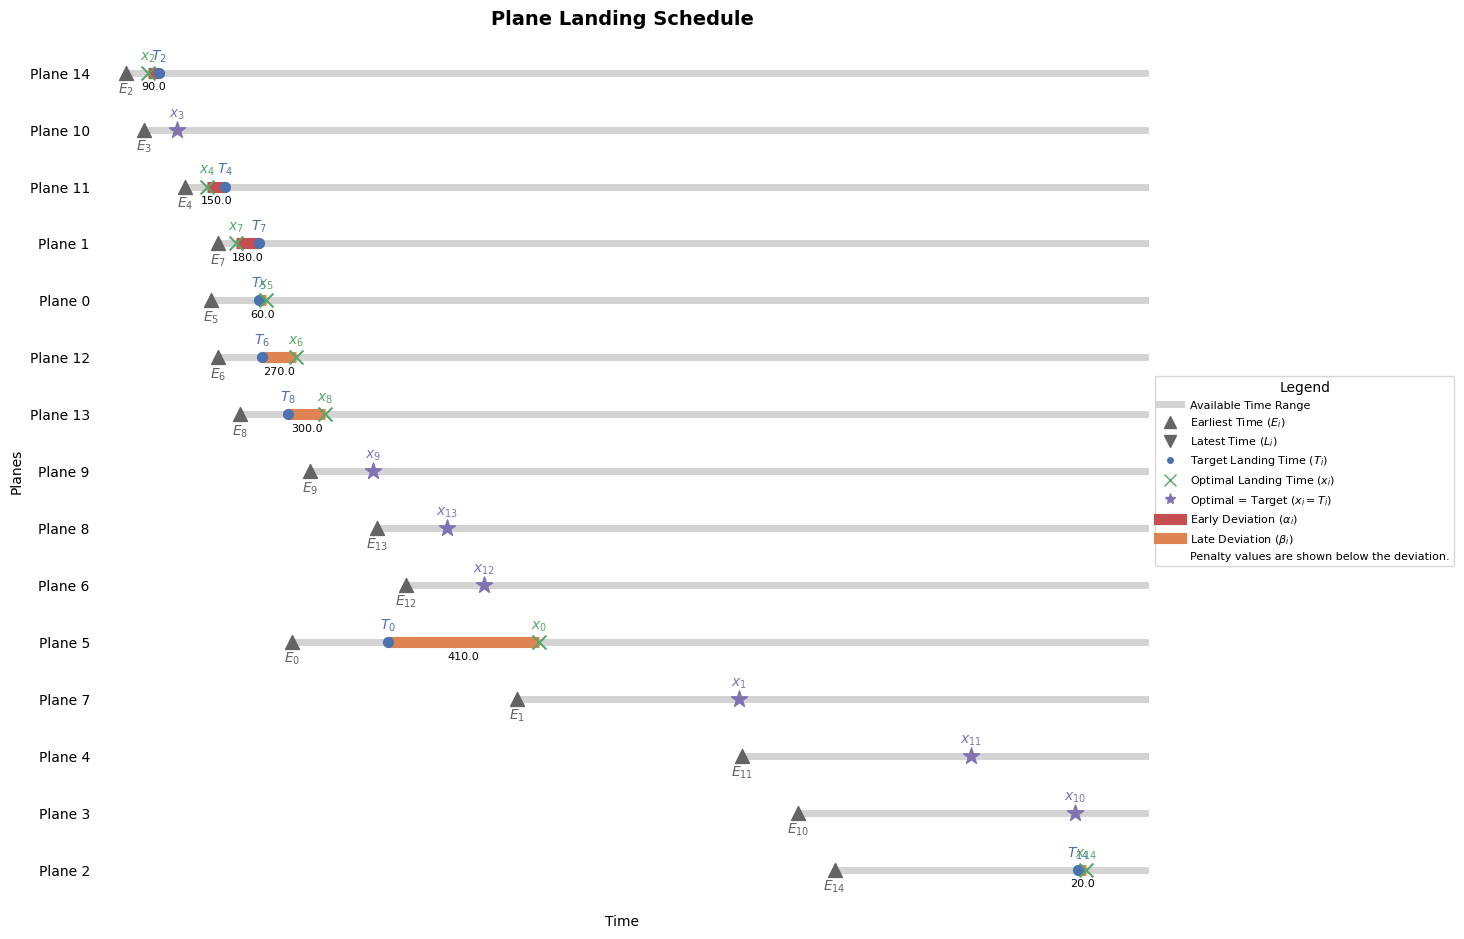

In [10]:
filename = "data/airland2.txt"

num_planes, planes_data, separation_times = read_data(filename)

solver, variables, memory_before, memory_after = solve_single_runway_mip(
    num_planes, planes_data, separation_times
)
metrics_MIP_single_runway = performance_MIP(solver, memory_before, memory_after)
visualize_solution(num_planes, planes_data, variables)